### Download necessary packages

In [1]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr

### Northern MAB polygon

In [2]:
x = open("bndmbn.txt", "r", encoding="utf-8")
x.read()
x = '  40.50   74.00\n  39.50   72.00\n  40.00   71.40\n  40.00   69.50\n  41.00   69.50\n  41.10   70.00\n  41.00   72.00\n  40.50   74.00\n'
output1x = x.split('\n')

newx = [] 
for string in output1x:
    output2x = string.split(' ')
    newx.append(output2x)
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []

for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})

lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

In [3]:
polygon_x = Polygon(df_x.values.tolist())
print(polygon_x)

POLYGON ((74 40.5, 72 39.5, 71.40000000000001 40, 69.5 40, 69.5 41, 70 41.1, 72 41, 74 40.5))


In [61]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
for i in range(len(x)):
    if x[i] > 2 and x[i] <= 5 or x[i] > 10 and x[i] <= 15:
        print('yes')
    else:
        print('no')

no
no
yes
yes
yes
no
no
no
no
no
yes
yes
yes
yes
yes
no
no


### Running script

In [92]:
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd > 334 and yd <= 365:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_x.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'lat': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []; allmixedcount = []
            inconclusivecount = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[i,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                    break  
    monthly = []
    if len(seasonyeartemp) > 0:
        print('depth_',year,np.mean(seasonyeardepth))

depth_ 1977 25.88235294117647
depth_ 1979 39.8421052631579
depth_ 1980 32.75
depth_ 1981 47.1
depth_ 1982 33.27272727272727
depth_ 1983 49.916666666666664
depth_ 1985 33.0
depth_ 1988 34.94736842105263
depth_ 1990 41.0
depth_ 1991 38.476190476190474
depth_ 1992 37.333333333333336
depth_ 1993 43.3
depth_ 2010 46.63157894736842
depth_ 2011 24.06896551724138


### BY MONTHS

In [93]:
january = statistics.mean([28.166666666666668,41.23076923076923,47.22727272727273,44.333333333333336,
                          7.0,40.27777777777778,32.50847457627118,42.34782608695652,41.708333333333336,
                          37.49230769230769,37.416666666666664,58.0,270.0,39.13636363636363,31.0,
                          176.5,78.0])
february = statistics.mean([15.625,29.75,44.2,27.75,5.0,39.25,38.88636363636363,39.32727272727273,42.86486486486486,
                           32.55555555555556,41.0,40.625,30.11111111111111,55.303030303030305,40.94444444444444,
                           32.78378378378378,42.59756097560975,42.285714285714285,48.666666666666664,48.35,
                           40.4,41.166666666666664,49.583333333333336,32.875,44.6,44.42857142857143,
                           34.04347826086956,39.18181818181818,48.52173913043478])
march = statistics.mean([33.92857142857143,24.52173913043478,39.93181818181818,34.68421052631579,
                         29.047619047619047,29.122448979591837,37.95774647887324,26.102564102564102,
                         33.02857142857143,21.571428571428573,16.571428571428573,32.18181818181818,
                         41.403225806451616,30.90909090909091,21.967741935483872,30.86842105263158,
                         35.04,15.911764705882353,33.03448275862069,35.388888888888886,29.066666666666666,
                         33.3921568627451,26.41176470588235,38.5,27.177777777777777,36.55555555555556,
                         40.629629629629626,26.962962962962962,32.535714285714285,29.09375,34.0,
                         18.3125,28.926829268292682])
april = statistics.mean([34.523809523809526,40.8,26.90909090909091,24.125,
                         36.36363636363637,40.45454545454545,39.078947368421055,24.0,
                         29.695652173913043,53.833333333333336,43.0,33.875,25.0,28.0,
                         37.0,41.55,39.1,38.0,29.0,38.26315789473684,29.746031746031747,50.65,
                         39.833333333333336,24.68,40.97674418604651,25.0])
may = statistics.mean([12.444444444444445,14.863636363636363,24.41176470588235,
                       10.695652173913043,11.277777777777779,12.85,17.65753424657534,
                       6.833333333333333,35.0,15.666666666666666,6.5,33.81818181818182,
                       26.17391304347826,29.0,11.923076923076923,27.5,18.555555555555557,
                       13.454545454545455,12.28,16.357142857142858,8.166666666666666,
                       18.57894736842105,28.98181818181818,24.208333333333332,13.333333333333334,
                       31.933333333333334])
june = statistics.mean([7.533333333333333,8.0,8.875,9.105263157894736,9.428571428571429,
                        9.833333333333334,13.923076923076923,22.571428571428573,11.0,6.0,
                        31.0,6.0,10.666666666666666,19.833333333333332,13.434782608695652,
                        14.285714285714286,9.833333333333334,12.878048780487806,8.523809523809524,
                        8.8,19.0,9.214285714285714,12.88888888888889])
july = statistics.mean([0.0,9.117647058823529,5.083333333333333,8.363636363636363,
                        8.0,9.875,7.090909090909091,7.0,10.0,7.977777777777778,
                        8.538461538461538,7.666666666666667,9.88888888888889,
                        7.625,8.666666666666666,7.611111111111111,7.0,8.357142857142858,
                        8.5,6.8,6.0,7.428571428571429,8.0,7.6,9.0,7.0])
august = statistics.mean([3.1707317073170733,6.7,10.6875,9.285714285714286,
                          9.391304347826088,9.375,8.875,8.692307692307692,
                          9.9,6.0,7.282051282051282,8.25,6.5,15.8,7.0,
                          8.454545454545455,8.333333333333334,8.363636363636363,
                          8.047619047619047,12.789473684210526,11.8,11.235294117647058,
                          8.727272727272727,8.333333333333334,7.625,12.833333333333334,
                          8.444444444444445,9.61111111111111,8.647058823529411])
september = statistics.mean([0.0,14.047619047619047,15.904761904761905,11.333333333333334,
                             26.5,15.886363636363637,14.838709677419354,17.096153846153847,
                             16.445652173913043,26.029411764705884,14.51063829787234,
                             9.25,22.0,16.428571428571427,13.045454545454545,15.928571428571429,
                             13.44,13.8,12.153846153846153,20.26086956521739,13.833333333333334,
                             17.625,21.863636363636363,15.636363636363637,16.12,19.43243243243243,
                             20.387755102040817,23.125,22.725490196078432,23.26086956521739,19.08,
                             24.717391304347824])
october = statistics.mean([21.36842105263158,19.26086956521739,22.583333333333332,
                           22.227272727272727,29.866666666666667,28.875,32.55263157894737,
                           31.11111111111111,26.161290322580644,15.666666666666666,23.0,
                           28.8,27.428571428571427,19.692307692307693,21.391304347826086,
                           37.270270270270274,30.72340425531915,32.659574468085104,
                           24.58823529411765,34.851851851851855,37.2,35.130434782608695,
                           37.8421052631579,30.386363636363637,37.8235294117647])
november = statistics.mean([42.4,38.111111111111114,35.36363636363637,28.285714285714285,
                            40.13636363636363,49.86363636363637,26.692307692307693,32.68292682926829,
                            33.94444444444444,38.421052631578945,33.94736842105263,39.333333333333336,
                            47.94444444444444,38.95,39.15,33.791666666666664,49.285714285714285,
                            38.72,41.31818181818182,46.19230769230769,38.31578947368421,
                            42.642857142857146,57.111111111111114,43.516129032258064,
                            48.68421052631579,37.18181818181818,29.583333333333332,56.45454545454545,
                            44.55,35.69230769230769,37.23529411764706])
december = statistics.mean([25.88235294117647,39.8421052631579,32.75,47.1,
                            33.27272727272727,49.916666666666664,33.0,
                            34.94736842105263,41.0,38.476190476190474,
                            37.333333333333336,43.3,46.63157894736842,24.06896551724138])

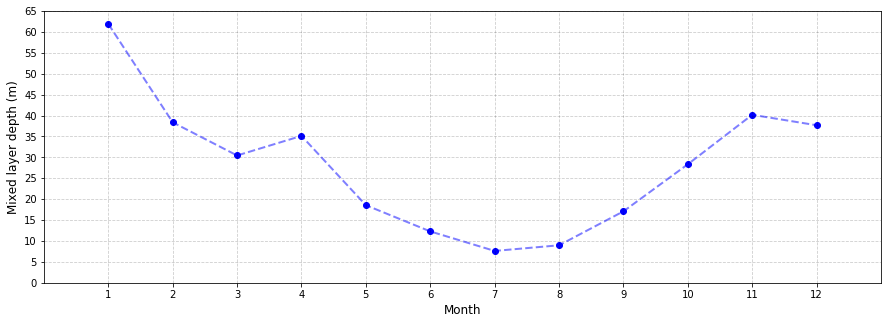

In [96]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [january, february, march, april, may, june, july, august, september,october,november,december]

plt.figure(figsize=(15, 5))
plt.xlim((0,13))
plt.ylim((0,65))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# # plt.title('Spring (AMJ) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]) 
plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65])
plt.savefig('timeseries_MLDLD_NorthernMAB')
plt.show()

### WINTER

In [62]:
depth_1977 = 25.88235294117647
depth_1978 = 15.625
depth_1979 = 39.8421052631579
depth_1980 = 32.32142857142857
depth_1981 = 47.1
depth_1982 = 33.27272727272727
depth_1983 = 46.74074074074074
depth_1984 = 28.09090909090909
depth_1985 = 39.642857142857146
depth_1986 = 47.22727272727273
depth_1987 = 44.333333333333336
depth_1988 = 33.55
depth_1989 = 40.27777777777778
depth_1990 = 34.76744186046512
depth_1991 = 39.69318181818182
depth_1992 = 39.48
depth_1993 = 40.07377049180328
depth_1994 = 34.2463768115942
depth_1995 = 48.93333333333333
depth_1996 = 40.625
depth_1997 = 30.11111111111111
depth_1998 = 55.303030303030305
depth_1999 = 40.94444444444444
depth_2000 = 32.78378378378378
depth_2001 = 42.59756097560975
depth_2002 = 42.285714285714285
depth_2003 = 48.666666666666664
depth_2004 = 48.35
depth_2005 = 57.407407407407405
depth_2006 = 41.166666666666664
depth_2007 = 49.583333333333336
depth_2008 = 39.13636363636363
depth_2009 = 31.9375
depth_2010 = 45.73529411764706
depth_2011 = 38.15384615384615
depth_2012 = 35.875
depth_2013 = 39.18181818181818
depth_2017 = 48.52173913043478

best fit line:
y = -519.21 + 0.28x


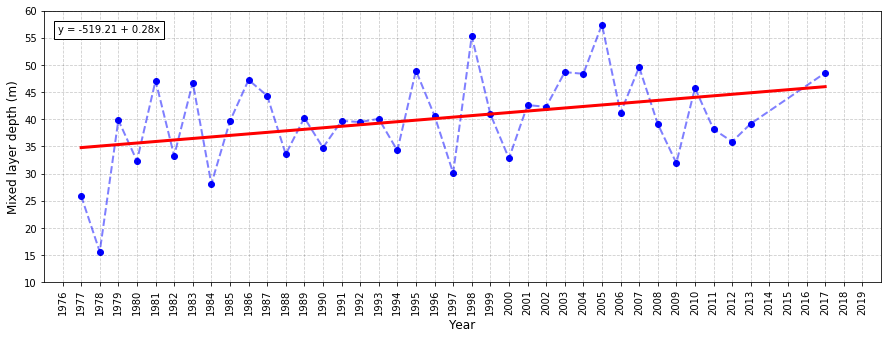

In [68]:
from matplotlib.offsetbox import AnchoredText

x = [1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,
    1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,
    2011,2012,2013,2017]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1983,
    depth_1984,depth_1985,depth_1986,depth_1987,depth_1988,depth_1989,depth_1990,
    depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,
    depth_1998,depth_1999,depth_2000,depth_2001,depth_2002,depth_2003,depth_2004,
    depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,depth_2010,depth_2011,
    depth_2012,depth_2013,depth_2017]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
plt.ylim((10,60))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
plt.yticks([10,15,20,25,30,35,40,45,50,55,60])
a = AnchoredText("y = -519.21 + 0.28x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_winterMLDLD_NorthernMAB')
plt.show()

### FALL

In [40]:
depth_1977 = 20.3
depth_1978 = 26.272727272727273
depth_1979 = 22.583333333333332
depth_1980 = 22.227272727272727
depth_1983 = 38.111111111111114
depth_1984 = 35.36363636363637
depth_1985 = 21.166666666666668
depth_1986 = 28.302325581395348
depth_1987 = 38.67741935483871
depth_1988 = 26.692307692307693
depth_1989 = 32.68292682926829
depth_1990 = 30.790697674418606
depth_1991 = 23.380281690140844
depth_1992 = 24.594202898550726
depth_1993 = 21.6056338028169
depth_1994 = 17.752475247524753
depth_1995 = 26.029411764705884
depth_1996 = 16.0
depth_1997 = 19.529411764705884
depth_1998 = 24.08695652173913
depth_1999 = 27.416666666666668
depth_2000 = 22.407894736842106
depth_2001 = 20.36764705882353
depth_2002 = 27.28767123287671
depth_2003 = 21.866666666666667
depth_2004 = 25.677966101694917
depth_2005 = 27.276923076923076
depth_2006 = 25.53846153846154
depth_2007 = 22.44776119402985
depth_2008 = 32.757894736842104
depth_2009 = 32.74
depth_2010 = 34.18181818181818
depth_2011 = 25.609375
depth_2012 = 26.513157894736842
depth_2013 = 27.784615384615385
depth_2014 = 33.64179104477612
depth_2015 = 26.82857142857143
depth_2016 = 27.940298507462686
depth_2017 = 35.69230769230769
depth_2018 = 23.686567164179106
depth_2019 = 30.2875

best fit line:
y = -109.20 + 0.07x


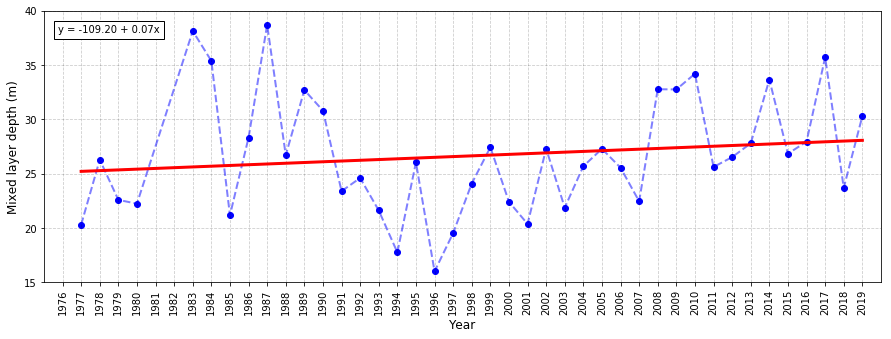

In [44]:
from matplotlib.offsetbox import AnchoredText

x = [1977,1978,1979,1980,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,
    1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
    2017,2018,2019]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1983,depth_1984,depth_1985,depth_1986,
    depth_1987,depth_1988,depth_1989,depth_1990,depth_1991,depth_1992,depth_1993,depth_1994,
    depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,depth_2000,depth_2001,depth_2002,
    depth_2003,depth_2004,depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,depth_2010,
    depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,depth_2017,depth_2018,depth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
plt.ylim((15,40))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
plt.yticks([15,20,25,30,35,40])
a = AnchoredText("y = -109.20 + 0.07x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_fallMLDLD_NorthernMAB')
plt.show()

### SUMMER

In [27]:
depth_1977 = 3.0952380952380953
depth_1978 = 7.8108108108108105
depth_1979 = 7.325
depth_1980 = 7.884615384615385
depth_1981 = 8.0
depth_1982 = 8.0
depth_1983 = 8.875
depth_1987 = 9.285714285714286
depth_1989 = 9.261904761904763
depth_1991 = 9.625
depth_1992 = 9.133333333333333
depth_1993 = 8.692307692307692
depth_1994 = 8.74074074074074
depth_1995 = 11.68421052631579
depth_1996 = 9.617021276595745
depth_1997 = 8.0
depth_1998 = 8.826086956521738
depth_1999 = 13.033333333333333
depth_2000 = 14.538461538461538
depth_2001 = 7.444444444444445
depth_2002 = 8.529411764705882
depth_2003 = 8.333333333333334
depth_2004 = 8.369565217391305
depth_2005 = 8.0
depth_2006 = 12.282051282051283
depth_2007 = 11.5
depth_2008 = 11.866666666666667
depth_2009 = 11.84
depth_2010 = 9.619047619047619
depth_2011 = 12.714285714285714
depth_2012 = 8.044444444444444
depth_2013 = 9.242424242424242
depth_2014 = 8.0
depth_2015 = 19.0
depth_2016 = 8.58695652173913
depth_2017 = 12.88888888888889
depth_2018 = 9.578947368421053
depth_2019 = 8.473684210526315

best fit line:
y = -178.82 + 0.09x


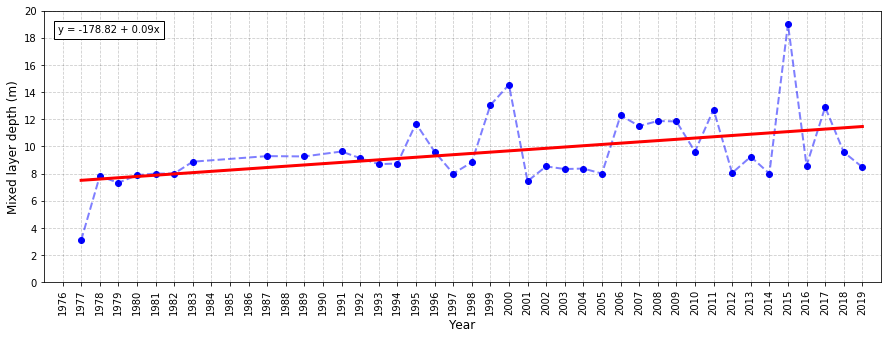

In [33]:
from matplotlib.offsetbox import AnchoredText

x = [1977,1978,1979,1980,1981,1982,1983,1987,1989,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,
    2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1977,depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1983,depth_1987,depth_1989,
    depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,depth_1998,depth_1999,
    depth_2000,depth_2001,depth_2002,depth_2003,depth_2004,depth_2005,depth_2006,depth_2007,depth_2008,
    depth_2009,depth_2010,depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,depth_2017,
    depth_2018,depth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((5,45))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
a = AnchoredText("y = -178.82 + 0.09x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_summerMLDLD_NorthernMAB')
plt.show()

### SPRING

In [10]:
depth_1978 = 21.84375
depth_1979 = 19.8
depth_1980 = 38.184615384615384
depth_1981 = 35.958333333333336
depth_1982 = 26.973684210526315
depth_1984 = 10.695652173913043
depth_1985 = 19.875
depth_1986 = 12.85
depth_1987 = 17.65753424657534
depth_1988 = 6.833333333333333
depth_1991 = 29.122448979591837
depth_1992 = 37.95774647887324
depth_1993 = 26.142857142857142
depth_1994 = 33.82608695652174
depth_1995 = 29.88
depth_1996 = 33.01923076923077
depth_1997 = 31.32758620689655
depth_1998 = 37.41428571428571
depth_1999 = 30.333333333333332
depth_2000 = 26.70769230769231
depth_2001 = 31.313432835820894
depth_2002 = 34.114285714285714
depth_2003 = 19.333333333333332
depth_2004 = 29.11111111111111
depth_2005 = 33.865671641791046
depth_2006 = 29.714285714285715
depth_2007 = 31.166666666666668
depth_2008 = 28.876923076923077
depth_2009 = 29.602739726027398
depth_2010 = 26.208955223880597
depth_2011 = 33.71666666666667
depth_2012 = 40.41818181818182
depth_2013 = 31.630434782608695
depth_2014 = 30.604395604395606
depth_2015 = 32.352112676056336
depth_2016 = 30.925373134328357
depth_2017 = 27.675675675675677
depth_2018 = 29.805194805194805
depth_2019 = 28.294642857142858

In [9]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

best fit line:
y = -426.69 + 0.23x


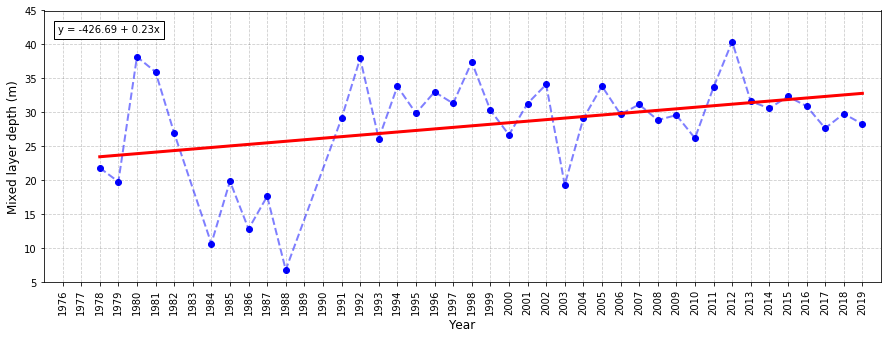

In [16]:
from matplotlib.offsetbox import AnchoredText

x = [1978,1979,1980,1981,1982,1984,1985,1986,1987,1988,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,
    2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
y = [depth_1978,depth_1979,depth_1980,depth_1981,depth_1982,depth_1984,depth_1985,depth_1986,depth_1987,
    depth_1988,depth_1991,depth_1992,depth_1993,depth_1994,depth_1995,depth_1996,depth_1997,depth_1998,
    depth_1999,depth_2000,depth_2001,depth_2002,depth_2003,depth_2004,depth_2005,depth_2006,depth_2007,
    depth_2008,depth_2009,depth_2010,depth_2011,depth_2012,depth_2013,depth_2014,depth_2015,depth_2016,
    depth_2017,depth_2018,depth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
plt.ylim((5,45))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.title('Spring (AMJ) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
plt.yticks([5,10,15,20,25,30,35,40,45])
a = AnchoredText("y = -426.69 + 0.23x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_springMLDLD_NorthernMAB')
plt.show()

In [70]:
filelen = []
Bottles = []; MK3 = []
SBE17 = []; SBE19 = []
MK5 = []; SBE19V2 = []
SBE911 = []; SBE19plus = []

for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = [];gear_intermediate = []
    Bottles_intermediate = []; MK3_intermediate = []
    SBE17_intermediate = []; SBE19_intermediate = []
    MK5_intermediate = []; SBE19V2_intermediate = []
    SBE911_intermediate = []; SBE19plus_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
        if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            yd_intermediate.append(npfile[i]['yd'])
            gear_intermediate.append(npfile[i]['gear'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'gear': gear_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_x.contains(point) == True:
            a = month_df['gear'].iloc[ii]
#             print(a)
            if a == 'Bottle':
                Bottles_intermediate.append(i)
            if a == 'MK-3':
                MK3_intermediate.append(i)
            if a == 'SBE-17':
                SBE17_intermediate.append(i)
            if a == 'SBE-19':
                SBE19_intermediate.append(i)
            if a == 'MK-5':
                MK5_intermediate.append(i)
            if a == 'SBE-19+V2':
                SBE19V2_intermediate.append(i)
            if a == 'SBE-911+':
                SBE911_intermediate.append(i)
            if a == 'SBE-19+':
                SBE19plus_intermediate.append(i)
    Bottles.append(len(Bottles_intermediate))
    MK3.append(len(MK3_intermediate))
    SBE17.append(len(SBE17_intermediate))
    SBE19.append(len(SBE19_intermediate))
    MK5.append(len(MK5_intermediate))
    SBE19V2.append(len(SBE19V2_intermediate))
    SBE911.append(len(SBE911_intermediate))
    SBE19plus.append(len(SBE19plus_intermediate))

In [71]:
years = [1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [72]:
df = pd.DataFrame(index=years, 
                  data={'Bottle': Bottles,'MK-3': MK3, 
                        'SBE-17': SBE17,'SBE-19': SBE19,
                        'SBE-19+V2': SBE19V2,'SBE-911+': SBE911,
                        'SBE-19+': SBE19plus,'MK-5': MK5})

In [73]:
print(df)

      Bottle  MK-3  SBE-17  SBE-19  SBE-19+V2  SBE-911+  SBE-19+  MK-5
1977      17     0       0       0          0         0        0     0
1978       8     0       0       0          0         0        0     0
1979      19     0       0       0          0         0        0     0
1980      28     0       0       0          0         0        0     0
1981      10     0       0       0          0         0        0     0
1982      22     0       0       0          0         0        0     0
1983      27     0       0       0          0         0        0     0
1984      22     0       0       0          0         0        0     0
1985      28     0       0       0          0         0        0     0
1986      23     0       0       0          0         0        0     0
1987      22     0       0       0          0         0        0     0
1988       0     0      20       0          0         0        0     0
1989       0     0      18       0          0         0        0     0
1990  

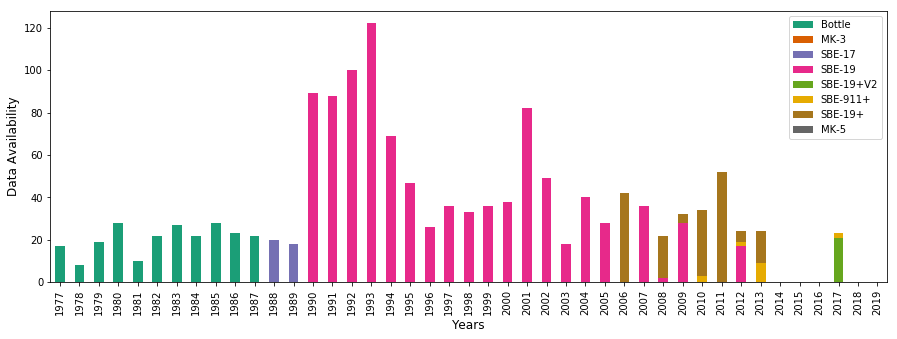

In [74]:
ax.set_xlim(1975, 2020)
ax = df.plot(kind="bar", stacked=True, cmap = 'Dark2') #tab10
plt.gcf().set_size_inches(15, 5)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xlabel('Years',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('datacollection_count_winterNMAB')
plt.show()